## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [16]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
print(x_train.shape)
print(y_train.shape)
keras.utils.to_categorical(y_train, num_classes=10).shape

(50000, 32, 32, 3)
(50000, 1)


(50000, 10)

In [22]:
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [39]:
def build_mlp():
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [26]:
model=build_mlp()
model.summary()
optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],
             optimizer=optimizer)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [27]:

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 5ms/step - loss: 2.1146 - accuracy: 0.2384 - val_loss: 1.8152 - val_accuracy: 0.3404
Epoch 2/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7478 - accuracy: 0.3722 - val_loss: 1.6569 - val_accuracy: 0.3950
Epoch 3/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6503 - accuracy: 0.4082 - val_loss: 1.5693 - val_accuracy: 0.4374
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5596 - accuracy: 0.4480 - val_loss: 1.5591 - val_accuracy: 0.4375
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5219 - accuracy: 0.4572 - val_loss: 1.5027 - val_accuracy: 0.4686
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4630 - accuracy: 0.4812 - val_loss: 1.4756 - val_accuracy: 0.4788
Epoch 7/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4241 - accuracy: 0.4935 - val_loss: 1.4721 - val_accuracy: 0.4781

Epoch 58/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5594 - accuracy: 0.8014 - val_loss: 2.0420 - val_accuracy: 0.5002
Epoch 59/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5691 - accuracy: 0.7939 - val_loss: 1.9828 - val_accuracy: 0.5153
Epoch 60/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5268 - accuracy: 0.8131 - val_loss: 2.0480 - val_accuracy: 0.5084
Epoch 61/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5145 - accuracy: 0.8155 - val_loss: 2.0612 - val_accuracy: 0.5210
Epoch 62/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5023 - accuracy: 0.8205 - val_loss: 2.0834 - val_accuracy: 0.5101
Epoch 63/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5011 - accuracy: 0.8222 - val_loss: 2.1015 - val_accuracy: 0.5134
Epoch 64/500
196/196 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.8196 - val_loss: 2.2017 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2819 - accuracy: 0.8989 - val_loss: 3.6298 - val_accuracy: 0.5040
Epoch 116/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2174 - accuracy: 0.9235 - val_loss: 3.6908 - val_accuracy: 0.5002
Epoch 117/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2311 - accuracy: 0.9162 - val_loss: 3.7377 - val_accuracy: 0.4994
Epoch 118/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2389 - accuracy: 0.9144 - val_loss: 3.8252 - val_accuracy: 0.4915
Epoch 119/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2772 - accuracy: 0.8986 - val_loss: 3.7642 - val_accuracy: 0.5023
Epoch 120/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2583 - accuracy: 0.9086 - val_loss: 3.7444 - val_accuracy: 0.5043
Epoch 121/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2412 - accuracy: 0.9128 - val_loss: 3.8070 - val_ac

196/196 [==============================] - 1s 4ms/step - loss: 0.1272 - accuracy: 0.9562 - val_loss: 5.0425 - val_accuracy: 0.4970
Epoch 172/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9596 - val_loss: 4.9962 - val_accuracy: 0.5010
Epoch 173/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1549 - accuracy: 0.9450 - val_loss: 5.2645 - val_accuracy: 0.4947
Epoch 174/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2163 - accuracy: 0.9248 - val_loss: 5.0312 - val_accuracy: 0.4908
Epoch 175/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1967 - accuracy: 0.9317 - val_loss: 4.9571 - val_accuracy: 0.4903
Epoch 176/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1978 - accuracy: 0.9310 - val_loss: 4.9716 - val_accuracy: 0.4946
Epoch 177/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1148 - accuracy: 0.9602 - val_loss: 5.2478 - val_accuracy: 0.4975

196/196 [==============================] - 1s 4ms/step - loss: 0.1939 - accuracy: 0.9344 - val_loss: 5.8232 - val_accuracy: 0.4954
Epoch 228/500
196/196 [==============================] - 1s 4ms/step - loss: 0.2226 - accuracy: 0.9260 - val_loss: 5.7047 - val_accuracy: 0.4925
Epoch 229/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1717 - accuracy: 0.9397 - val_loss: 5.6832 - val_accuracy: 0.4944
Epoch 230/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1308 - accuracy: 0.9537 - val_loss: 5.8576 - val_accuracy: 0.4926
Epoch 231/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0783 - accuracy: 0.9718 - val_loss: 5.9526 - val_accuracy: 0.4998
Epoch 232/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0613 - accuracy: 0.9789 - val_loss: 5.9046 - val_accuracy: 0.4951
Epoch 233/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1686 - accuracy: 0.9439 - val_loss: 5.7615 - val_accuracy: 0.4861

196/196 [==============================] - 1s 4ms/step - loss: 0.0865 - accuracy: 0.9687 - val_loss: 6.5257 - val_accuracy: 0.4925
Epoch 284/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.9804 - val_loss: 6.6878 - val_accuracy: 0.4845
Epoch 285/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1308 - accuracy: 0.9556 - val_loss: 6.5673 - val_accuracy: 0.4908
Epoch 286/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1418 - accuracy: 0.9521 - val_loss: 6.9256 - val_accuracy: 0.4856
Epoch 287/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1642 - accuracy: 0.9464 - val_loss: 6.6065 - val_accuracy: 0.4937
Epoch 288/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9633 - val_loss: 6.7307 - val_accuracy: 0.4872
Epoch 289/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1332 - accuracy: 0.9545 - val_loss: 6.5576 - val_accuracy: 0.4921

196/196 [==============================] - 1s 4ms/step - loss: 0.0410 - accuracy: 0.9864 - val_loss: 7.0532 - val_accuracy: 0.4990
Epoch 340/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0303 - accuracy: 0.9898 - val_loss: 7.1796 - val_accuracy: 0.4930
Epoch 341/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0924 - accuracy: 0.9686 - val_loss: 7.1887 - val_accuracy: 0.4881
Epoch 342/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1470 - accuracy: 0.9526 - val_loss: 7.0642 - val_accuracy: 0.4922
Epoch 343/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1623 - accuracy: 0.9493 - val_loss: 7.2872 - val_accuracy: 0.4900
Epoch 344/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1159 - accuracy: 0.9608 - val_loss: 7.3089 - val_accuracy: 0.4885
Epoch 345/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1262 - accuracy: 0.9578 - val_loss: 7.3370 - val_accuracy: 0.4897

196/196 [==============================] - 1s 4ms/step - loss: 0.1125 - accuracy: 0.9624 - val_loss: 6.8985 - val_accuracy: 0.4969
Epoch 396/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9798 - val_loss: 6.9594 - val_accuracy: 0.4922
Epoch 397/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0516 - accuracy: 0.9821 - val_loss: 7.1877 - val_accuracy: 0.4929
Epoch 398/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1146 - accuracy: 0.9624 - val_loss: 7.0043 - val_accuracy: 0.4936
Epoch 399/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9714 - val_loss: 7.0613 - val_accuracy: 0.4918
Epoch 400/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9762 - val_loss: 7.3826 - val_accuracy: 0.4862
Epoch 401/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1461 - accuracy: 0.9545 - val_loss: 7.2897 - val_accuracy: 0.4927

196/196 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.9085 - val_loss: 5.9852 - val_accuracy: 0.4897
Epoch 452/500
196/196 [==============================] - 1s 4ms/step - loss: 0.1848 - accuracy: 0.9392 - val_loss: 6.2562 - val_accuracy: 0.4989
Epoch 453/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9830 - val_loss: 6.4559 - val_accuracy: 0.4965
Epoch 454/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 6.4428 - val_accuracy: 0.4959
Epoch 455/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 6.6923 - val_accuracy: 0.4956
Epoch 456/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 6.6637 - val_accuracy: 0.5027
Epoch 457/500
196/196 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9950 - val_loss: 6.8866 - val_accuracy: 0.4924

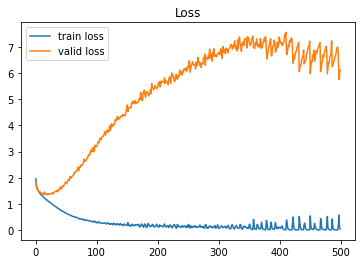

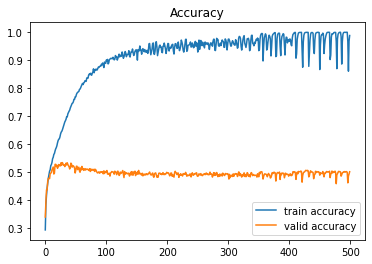

In [28]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [40]:
opt=keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],
             optimizer=opt)

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 1s 5ms/step - loss: 2.2980 - accuracy: 0.1308 - val_loss: 2.2108 - val_accuracy: 0.2150
Epoch 2/500
196/196 [==============================] - 1s 4ms/step - loss: 2.1892 - accuracy: 0.2191 - val_loss: 2.1394 - val_accuracy: 0.2392
Epoch 3/500
196/196 [==============================] - 1s 4ms/step - loss: 2.1230 - accuracy: 0.2439 - val_loss: 2.0860 - val_accuracy: 0.2655
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 2.0715 - accuracy: 0.2697 - val_loss: 2.0451 - val_accuracy: 0.2834
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 2.0310 - accuracy: 0.2859 - val_loss: 2.0129 - val_accuracy: 0.2940
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 2.0013 - accuracy: 0.2992 - val_loss: 1.9863 - val_accuracy: 0.3086
Epoch 7/500
196/196 [==============================] - 1s 4ms/step - loss: 1.9774 - accuracy: 0.3077 - val_loss: 1.9639 - val_accuracy: 0.3137

Epoch 58/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6459 - accuracy: 0.4223 - val_loss: 1.6588 - val_accuracy: 0.4152
Epoch 59/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6464 - accuracy: 0.4253 - val_loss: 1.6550 - val_accuracy: 0.4193
Epoch 60/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6388 - accuracy: 0.4266 - val_loss: 1.6547 - val_accuracy: 0.4163
Epoch 61/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6434 - accuracy: 0.4270 - val_loss: 1.6486 - val_accuracy: 0.4202
Epoch 62/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6309 - accuracy: 0.4314 - val_loss: 1.6495 - val_accuracy: 0.4190
Epoch 63/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6346 - accuracy: 0.4312 - val_loss: 1.6444 - val_accuracy: 0.4208
Epoch 64/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6283 - accuracy: 0.4301 - val_loss: 1.6408 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5221 - accuracy: 0.4679 - val_loss: 1.5503 - val_accuracy: 0.4517
Epoch 116/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5168 - accuracy: 0.4724 - val_loss: 1.5431 - val_accuracy: 0.4574
Epoch 117/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5149 - accuracy: 0.4684 - val_loss: 1.5428 - val_accuracy: 0.4563
Epoch 118/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5121 - accuracy: 0.4742 - val_loss: 1.5476 - val_accuracy: 0.4548
Epoch 119/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5190 - accuracy: 0.4692 - val_loss: 1.5421 - val_accuracy: 0.4569
Epoch 120/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5112 - accuracy: 0.4734 - val_loss: 1.5413 - val_accuracy: 0.4551
Epoch 121/500
196/196 [==============================] - 1s 4ms/step - loss: 1.5065 - accuracy: 0.4742 - val_loss: 1.5352 - val_ac

196/196 [==============================] - 1s 4ms/step - loss: 1.4218 - accuracy: 0.5030 - val_loss: 1.4758 - val_accuracy: 0.4734
Epoch 172/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4221 - accuracy: 0.5031 - val_loss: 1.4775 - val_accuracy: 0.4767
Epoch 173/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4236 - accuracy: 0.5025 - val_loss: 1.4853 - val_accuracy: 0.4731
Epoch 174/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4204 - accuracy: 0.5044 - val_loss: 1.4755 - val_accuracy: 0.4783
Epoch 175/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4202 - accuracy: 0.5040 - val_loss: 1.4711 - val_accuracy: 0.4758
Epoch 176/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4128 - accuracy: 0.5070 - val_loss: 1.4732 - val_accuracy: 0.4749
Epoch 177/500
196/196 [==============================] - 1s 4ms/step - loss: 1.4161 - accuracy: 0.5031 - val_loss: 1.4728 - val_accuracy: 0.4763

196/196 [==============================] - 1s 4ms/step - loss: 1.3442 - accuracy: 0.5261 - val_loss: 1.4280 - val_accuracy: 0.4943
Epoch 228/500
196/196 [==============================] - 1s 4ms/step - loss: 1.3403 - accuracy: 0.5303 - val_loss: 1.4348 - val_accuracy: 0.4890
Epoch 229/500
196/196 [==============================] - 1s 4ms/step - loss: 1.3490 - accuracy: 0.5295 - val_loss: 1.4264 - val_accuracy: 0.4914
Epoch 230/500
196/196 [==============================] - 1s 4ms/step - loss: 1.3371 - accuracy: 0.5327 - val_loss: 1.4343 - val_accuracy: 0.4883
Epoch 231/500
196/196 [==============================] - 1s 4ms/step - loss: 1.3372 - accuracy: 0.5268 - val_loss: 1.4327 - val_accuracy: 0.4931
Epoch 232/500
196/196 [==============================] - 1s 4ms/step - loss: 1.3319 - accuracy: 0.5342 - val_loss: 1.4414 - val_accuracy: 0.4886
Epoch 233/500
196/196 [==============================] - 1s 4ms/step - loss: 1.3357 - accuracy: 0.5339 - val_loss: 1.4270 - val_accuracy: 0.4922

196/196 [==============================] - 1s 4ms/step - loss: 1.2839 - accuracy: 0.5522 - val_loss: 1.4102 - val_accuracy: 0.4962
Epoch 284/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2742 - accuracy: 0.5555 - val_loss: 1.3930 - val_accuracy: 0.5035
Epoch 285/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2708 - accuracy: 0.5538 - val_loss: 1.4131 - val_accuracy: 0.5007
Epoch 286/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2783 - accuracy: 0.5533 - val_loss: 1.3975 - val_accuracy: 0.5030
Epoch 287/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2771 - accuracy: 0.5529 - val_loss: 1.3960 - val_accuracy: 0.5019
Epoch 288/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2838 - accuracy: 0.5508 - val_loss: 1.4139 - val_accuracy: 0.4973
Epoch 289/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2794 - accuracy: 0.5511 - val_loss: 1.4185 - val_accuracy: 0.4989

196/196 [==============================] - 1s 4ms/step - loss: 1.2156 - accuracy: 0.5758 - val_loss: 1.3847 - val_accuracy: 0.5045
Epoch 340/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2217 - accuracy: 0.5703 - val_loss: 1.3804 - val_accuracy: 0.5084
Epoch 341/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2226 - accuracy: 0.5720 - val_loss: 1.3889 - val_accuracy: 0.5050
Epoch 342/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2204 - accuracy: 0.5752 - val_loss: 1.3793 - val_accuracy: 0.5055
Epoch 343/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2100 - accuracy: 0.5775 - val_loss: 1.4048 - val_accuracy: 0.5057
Epoch 344/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2142 - accuracy: 0.5752 - val_loss: 1.3923 - val_accuracy: 0.5077
Epoch 345/500
196/196 [==============================] - 1s 4ms/step - loss: 1.2105 - accuracy: 0.5765 - val_loss: 1.3933 - val_accuracy: 0.5103

196/196 [==============================] - 1s 4ms/step - loss: 1.1698 - accuracy: 0.5914 - val_loss: 1.3699 - val_accuracy: 0.5139
Epoch 396/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1603 - accuracy: 0.5963 - val_loss: 1.3624 - val_accuracy: 0.5186
Epoch 397/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1632 - accuracy: 0.5926 - val_loss: 1.3535 - val_accuracy: 0.5217
Epoch 398/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1661 - accuracy: 0.5930 - val_loss: 1.3578 - val_accuracy: 0.5201
Epoch 399/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1580 - accuracy: 0.5976 - val_loss: 1.3672 - val_accuracy: 0.5158
Epoch 400/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1542 - accuracy: 0.5971 - val_loss: 1.3612 - val_accuracy: 0.5149
Epoch 401/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1516 - accuracy: 0.5968 - val_loss: 1.3587 - val_accuracy: 0.5187

196/196 [==============================] - 1s 4ms/step - loss: 1.0964 - accuracy: 0.6179 - val_loss: 1.3555 - val_accuracy: 0.5169
Epoch 452/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1044 - accuracy: 0.6172 - val_loss: 1.3444 - val_accuracy: 0.5274
Epoch 453/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1047 - accuracy: 0.6152 - val_loss: 1.3389 - val_accuracy: 0.5277
Epoch 454/500
196/196 [==============================] - 1s 4ms/step - loss: 1.0958 - accuracy: 0.6167 - val_loss: 1.3609 - val_accuracy: 0.5208
Epoch 455/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1003 - accuracy: 0.6177 - val_loss: 1.3586 - val_accuracy: 0.5206
Epoch 456/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1039 - accuracy: 0.6168 - val_loss: 1.3539 - val_accuracy: 0.5247
Epoch 457/500
196/196 [==============================] - 1s 4ms/step - loss: 1.1068 - accuracy: 0.6120 - val_loss: 1.3619 - val_accuracy: 0.5202

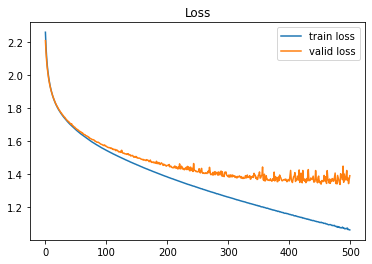

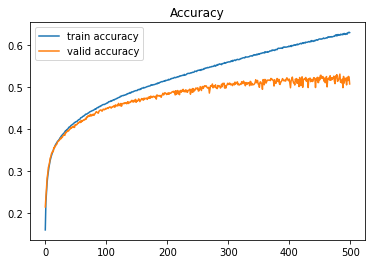

In [41]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()